In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns




C:\Users\bhaswati.sengupta\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
data = pd.read_excel('Road Accident Data.xlsx')



In [3]:
data.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,BS0000001,2021-01-01,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Dry,One way street,30,15:11:00,Urban,Fine no high winds,Car
1,BS0000002,2021-01-05,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,None,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59:00,Urban,Fine no high winds,Taxi/Private hire car
2,BS0000003,2021-01-04,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19:00,Urban,Fine no high winds,Taxi/Private hire car
3,BS0000004,2021-01-05,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,08:10:00,Urban,Other,Motorcycle over 500cc
4,BS0000005,2021-01-06,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,None,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25:00,Urban,Fine no high winds,Car


In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)



Missing values:
 Accident_Index                 0
Accident Date                  0
Day_of_Week                    0
Junction_Control               0
Junction_Detail                0
Accident_Severity              0
Latitude                       0
Light_Conditions               0
Local_Authority_(District)     0
Carriageway_Hazards            3
Longitude                      0
Number_of_Casualties           0
Number_of_Vehicles             0
Police_Force                   0
Road_Surface_Conditions        0
Road_Type                      0
Speed_limit                    0
Time                          17
Urban_or_Rural_Area            0
Weather_Conditions             0
Vehicle_Type                   0
dtype: int64


In [5]:
# Droping rows with missing values in 'Carriageway_Hazards' and 'Time' columns since there are only a few missing values, dropping them may not significantly affect the dataset's integrity.
data_cleaned = data.dropna(subset=['Carriageway_Hazards', 'Time'])


In [6]:
import numpy as np

# Calculate z-scores for each numerical column
z_scores = (data_cleaned.select_dtypes(include=np.number) - data_cleaned.select_dtypes(include=np.number).mean()) / data_cleaned.select_dtypes(include=np.number).std()

# Define threshold for outliers (typically z-score > 3 or < -3)
outlier_threshold = 3

# Identify outliers
outliers = (z_scores > outlier_threshold) | (z_scores < -outlier_threshold)

# Get the columns with outliers
columns_with_outliers = outliers.any()

# Print columns with outliers
print("Columns with outliers:")
print(columns_with_outliers[columns_with_outliers].index)




Columns with outliers:
Index(['Latitude', 'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles'], dtype='object')


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


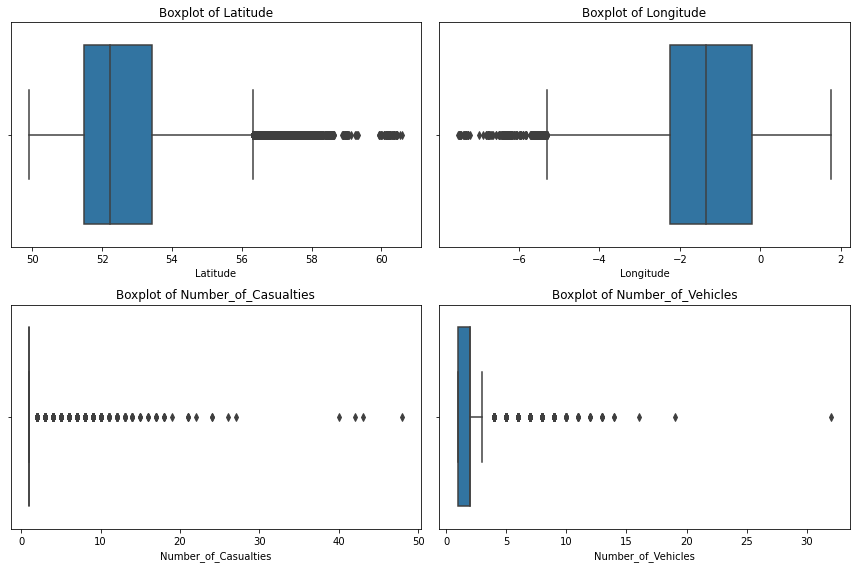

In [9]:

# Select columns with outliers
columns_with_outliers = ['Latitude', 'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles']

# Create box plots for each column with outliers
plt.figure(figsize=(12, 8))
for i, column in enumerate(columns_with_outliers, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data_cleaned[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()



In [58]:
#data_cleaned.to_excel("Road_Accident_clean_data1.xlsx")

In [10]:


# Set up plotting parameters
sns.set(style="whitegrid")



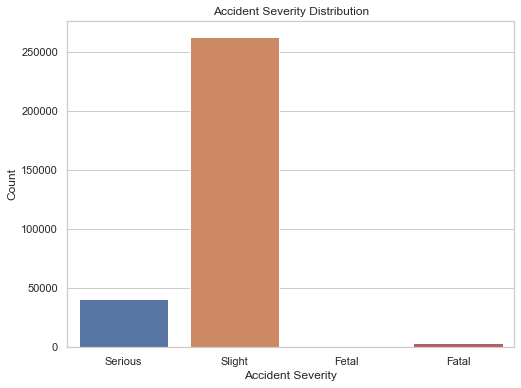

In [11]:
# KPI 1: Accident Severity Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Accident_Severity', data=data)
plt.title('Accident Severity Distribution')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.show()



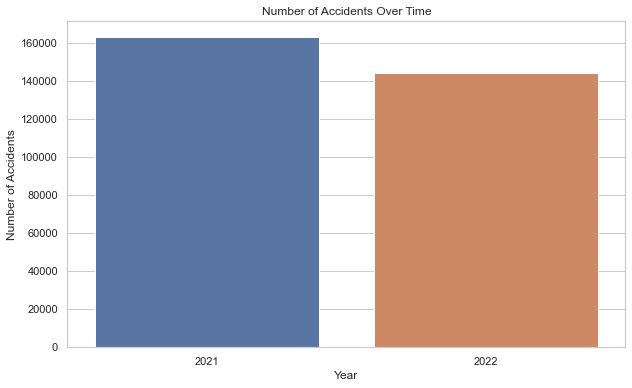

In [12]:
# KPI 2: Number of Accidents Over Time
data['Accident Date'] = pd.to_datetime(data['Accident Date'])
data['Year'] = data['Accident Date'].dt.year
data['Month'] = data['Accident Date'].dt.month

plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=data)
plt.title('Number of Accidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()



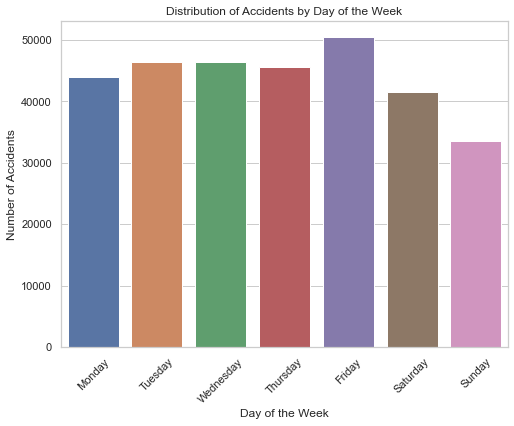

In [13]:
# KPI 3: Distribution of Accidents by Day of the Week
plt.figure(figsize=(8, 6))
day_of_week_counts = data['Day_of_Week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values)
plt.title('Distribution of Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


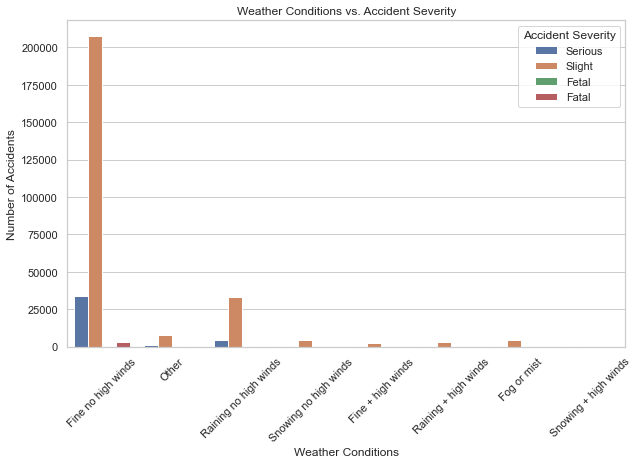

In [14]:
# KPI 5: Weather Conditions vs. Accident Severity
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather_Conditions', hue='Accident_Severity', data=data)
plt.title('Weather Conditions vs. Accident Severity')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Accident Severity')
plt.show()


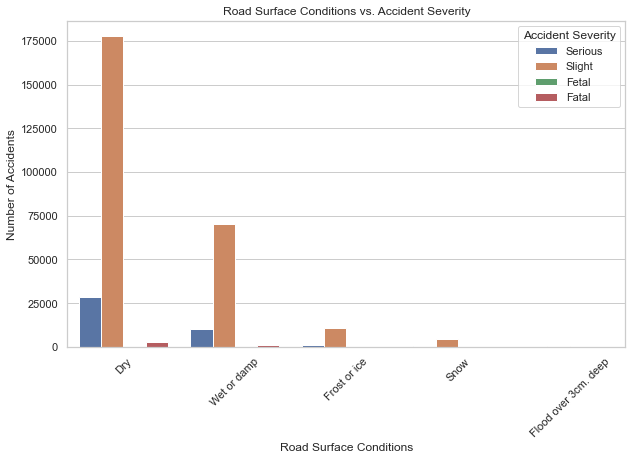

In [16]:
# KPI 6: Road Surface Conditions vs. Accident Severity
plt.figure(figsize=(10, 6))
sns.countplot(x='Road_Surface_Conditions', hue='Accident_Severity', data=data)
plt.title('Road Surface Conditions vs. Accident Severity')
plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Accident Severity')
plt.show()



#Number of serious accidents are more when the road surface is dry even though the accident severity is slight.